In [94]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [79]:
X_train_raw = np.random.randint(0,8, size=(10000))

In [80]:
X = tf.placeholder(shape=[None], dtype=tf.int32)
Y = tf.placeholder(shape=[None], dtype=tf.int32)
# X_train.shape

In [81]:
Wf1 = tf.Variable(tf.random_normal([8,3]))
bf1 = tf.Variable(tf.random_normal([3]))

Wf2 = tf.Variable(tf.random_normal([3,8]))
bf2 = tf.Variable(tf.random_normal([8]))


In [82]:
X_oh = tf.one_hot(X, depth=8)

out1 = tf.nn.xw_plus_b(X_oh, Wf1, bf1)
drop1 = tf.nn.dropout(out1, keep_prob=0.2)

out4 = tf.nn.xw_plus_b(drop1, Wf2, bf2)

In [85]:
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out4, labels=X_train_raw)
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)


In [92]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    train_step.run(feed_dict={X: X_train_raw, Y:X_train_raw})
    output = out1.eval(feed_dict={X:np.asarray([0,1,2,3,4,5,6,7])})

In [93]:
output

array([[ 0.97773612, -2.22286129,  1.09924138],
       [ 2.0033865 , -2.19311023,  2.59095812],
       [-1.01839554, -1.43485761, -0.64861763],
       [-0.88562727, -0.81412047, -0.95739889],
       [ 1.42931283, -0.5991106 ,  0.61672401],
       [-1.00993514, -0.61972284, -1.23156095],
       [ 2.52549434, -2.094486  ,  0.7623257 ],
       [ 0.95002627, -0.29530022,  0.54902327]], dtype=float32)

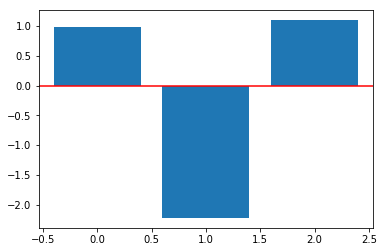

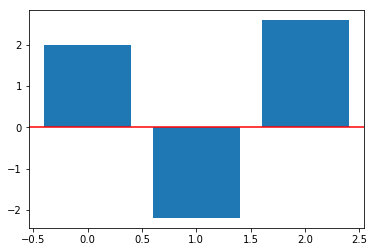

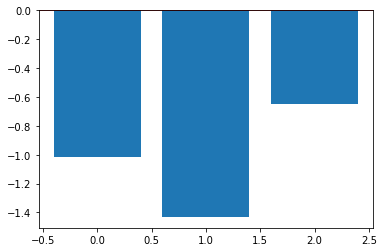

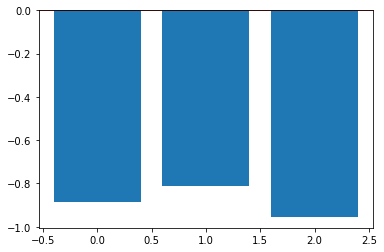

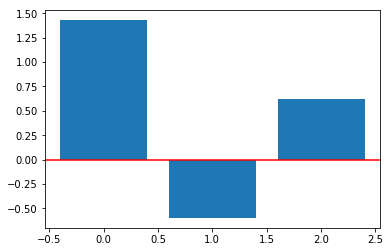

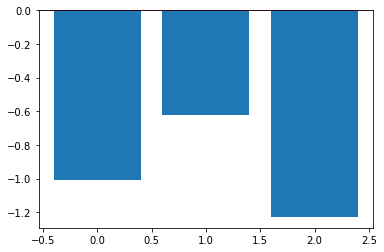

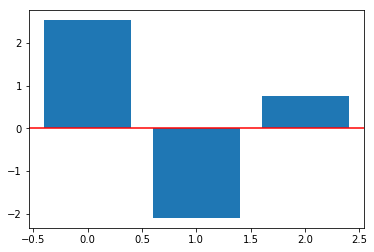

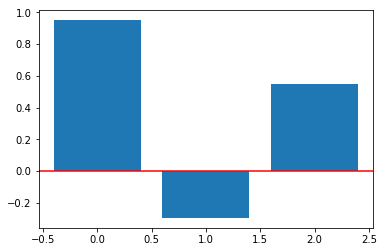

In [113]:
for i in output:
    plt.figure()
    plt.axhline(0, color='red')
#     p = i / np.linalg.norm(i)
    plt.bar([0,1,2], i)

In [114]:
for i in range(output.shape[0]):
    print(i, np.asarray(output[i] < 0, dtype=int))

0 [0 1 0]
1 [0 1 0]
2 [1 1 1]
3 [1 1 1]
4 [0 1 0]
5 [1 1 1]
6 [0 1 0]
7 [0 1 0]
